<h1>Step 3

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
data = pd.read_csv('data/training_c.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130,80.0,72.0,98.0,86.0,high risk
1,35.0,140,90.0,72.0,98.0,70.0,high risk
2,29.0,90,70.0,72.0,100.0,80.0,high risk
3,30.0,140,85.0,72.0,98.0,70.0,high risk
4,35.0,120,60.0,61.0,98.0,76.0,low risk


Dividiamo dataset per training set e test set

In [12]:
X = data.drop("RiskLevel", axis=1) #contiene le features
y = data['RiskLevel'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,random_state = 42)

Quindi abbiamo il Training set (X_train, y_train) utilizzato per addestrare il modello. Il Test set (X_test, y_test) è utilizzato per valutare le prestazioni del modello.


Standardizziamo i dati

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN

Cerchiamo graficamente il miglior valore di k

Il miglior valore di k è: 1


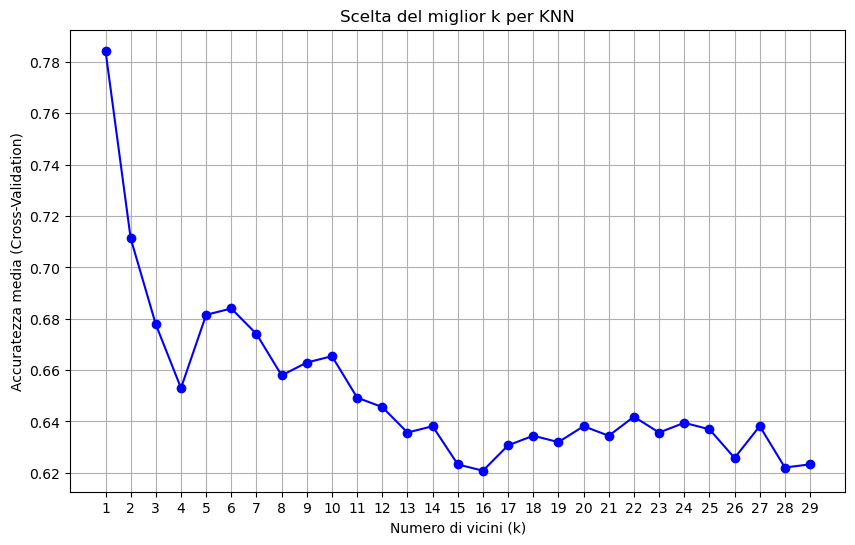

In [14]:
k_values = range(1, 30)  # Proviamo k da 1 a 30
cv_scores = []  # Salviamo le accuracy per ogni valore di k

# Loop su ogni valore di k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Definisci il modello KNN
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # Validazione incrociata
    cv_scores.append(scores.mean())  # Calcola l'accuratezza media per k

# Valore ottimale di k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Il miglior valore di k è: {optimal_k}")

# Risultati
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Numero di vicini (k)")
plt.ylabel("Accuratezza media (Cross-Validation)")
plt.title("Scelta del miglior k per KNN")
plt.xticks(k_values)
plt.grid(True)
plt.show()

Definiamo il modello KNN e addestriamolo sul training set 

In [15]:
model = KNeighborsClassifier(n_neighbors=1, p=2)
model.fit(X_train, y_train) #addestramento sui dati training

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = model.predict(X_test) #predizione sui nuovi dati test

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8564


In [17]:
cross_val_score(model, X, y, cv=10).mean()

0.8454554455445544

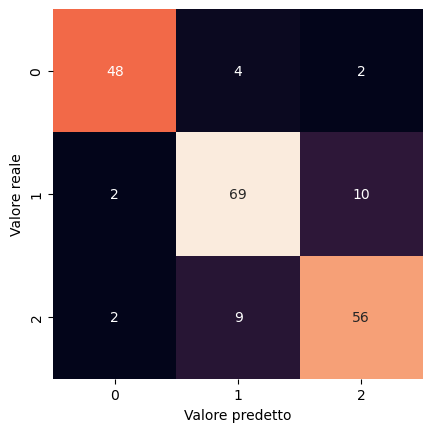

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat, square = True, annot= True, cbar= False)
plt.xlabel("Valore predetto")
plt.ylabel("Valore reale");

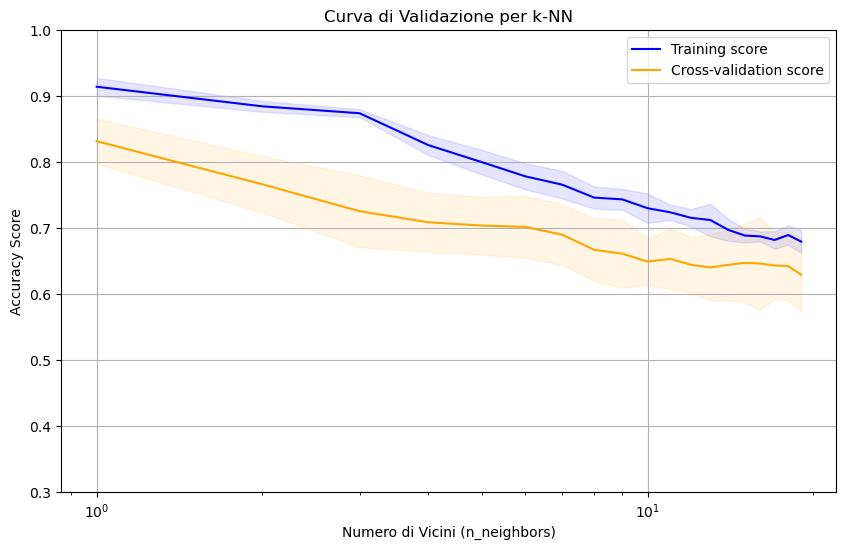

In [19]:
from sklearn.model_selection import validation_curve
# Definisci i parametri della curva di validazione
param_range = np.arange(1, 20, 1)  # Esempio: valori da 1 a 9 per il numero di vicini

# Calcola le curve di validazione
train_scores, test_scores = validation_curve(
    model, X, y, param_name="n_neighbors", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

# Calcola la media e la deviazione standard dei punteggi
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizza la curva di validazione
plt.figure(figsize=(10, 6))
plt.title('Curva di Validazione per k-NN')
plt.xlabel('Numero di Vicini (n_neighbors)')
plt.ylabel('Accuracy Score')
plt.ylim(0.3, 1.0)  # Imposta l'intervallo sull'asse y

plt.grid()

plt.semilogx(param_range, train_scores_mean, label='Training score', color='blue')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.semilogx(param_range, test_scores_mean, label='Cross-validation score', color='orange')
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.legend(loc='best')
plt.show()

Asse X: I valori del parametro analizzato (in questo caso, n_neighbors per il KNN).

Asse Y: L'accuratezza media del modello (o un'altra metrica scelta).

Linea Blu: Performance del modello sui dati di training.
Può diminuire all'aumentare della complessità del modello.

Linea Verde:Performance del modello sui dati di validazione.
Può migliorare inizialmente, ma tende a diminuire quando il modello è troppo complesso.

Curva di Apprendimento

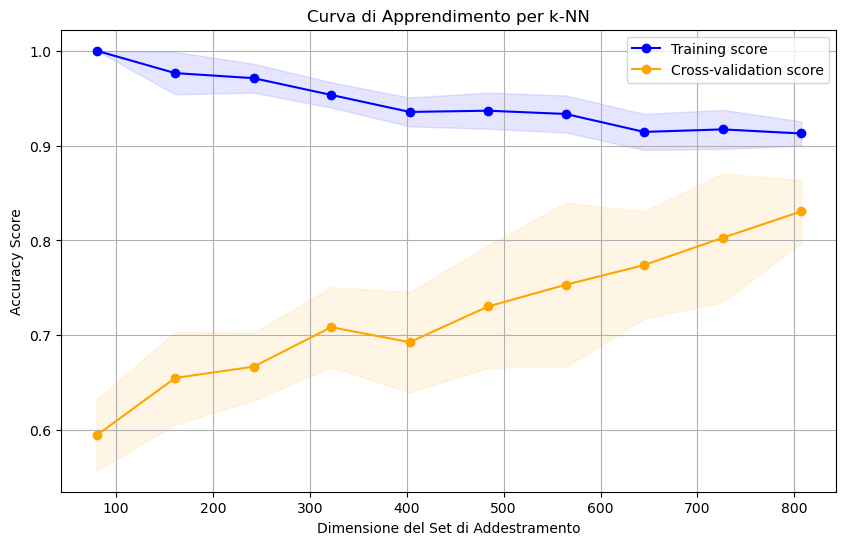

In [20]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Definisci i parametri della curva di apprendimento
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1)

# Calcola la media e la deviazione standard dei punteggi
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizza la curva di apprendimento
plt.figure(figsize=(10, 6))
plt.title('Curva di Apprendimento per k-NN')
plt.xlabel('Dimensione del Set di Addestramento')
plt.ylabel('Accuracy Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='orange')
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Cross-validation score')

plt.legend(loc='best')
plt.show()


-training score: è la prestazione del modello sui dati di addestramento (training set).
In generale, il training score sarà alto perché il modello è stato addestrato su questi dati, e quindi può imparare bene da essi, specialmente per modelli complessi.

-cross-validation score: è la prestazione del modello sui dati di validazione (o test set nel contesto della cross-validation).
Il cross-validation score serve a testare come il modello generalizza su dati che non ha visto durante l'addestramento. Se il modello generalizza bene, il cross-validation score sarà simile al training score.


Training score elevato e cross-validation score basso: Il modello sta overfittando, ovvero ha imparato troppo bene i dettagli del training set ma non riesce a generalizzare.


Entrambi bassi: Il modello underfitta, cioè non è in grado di apprendere bene nemmeno dai dati di addestramento.


Gaussian Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

Valutazione delle prestazioni del Gaussian Naive Bayes

In [22]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza: {accuracy:.4f}")

Accuratezza: 0.6238


In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

0.5936259297571549

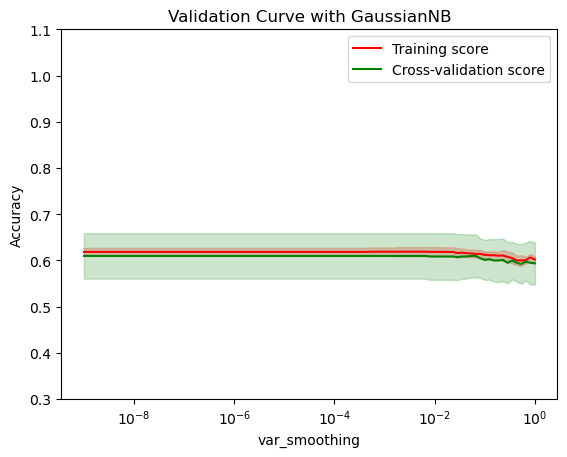

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Inizializza il modello GaussianNB
model = GaussianNB()

# Definisci il range per il parametro var_smoothing
param_range = np.logspace(-9, 0, 100)  # Da 10^-9 a 10^0

# Calcola le curve di validazione
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="var_smoothing", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1
)

# Calcola la media e la deviazione standard
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Traccia il grafico
plt.title("Validation Curve with GaussianNB")
plt.xlabel("var_smoothing")
plt.ylabel("Accuracy")
plt.ylim(0.3, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.xscale("log")
plt.legend(loc="best")
plt.show()
